In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import arch.data.wti
from arch import arch_model
from tqdm.notebook import tqdm

plt.style.use('bmh')

In [2]:
# get data WIT returns

crude = arch.data.wti.load()
crude_ret = 100 * crude.DCOILWTICO.dropna().apply(np.log).diff(1).dropna()
crude_ret

Date
1986-01-03    1.706791
1986-01-06    2.017963
1986-01-07   -2.596557
1986-01-08    0.077340
1986-01-09    0.616572
                ...   
2018-12-26    1.443910
2018-12-27   -3.447093
2018-12-28    1.495063
2019-01-02    2.536764
2019-01-03    1.308610
Name: DCOILWTICO, Length: 8320, dtype: float64

In [3]:
# fit model

res = arch_model(crude_ret, p=1, o=1, q=1, dist='skewt').fit(disp="off")
res.params

mu          0.013994
omega       0.047860
alpha[1]    0.049690
gamma[1]    0.026861
beta[1]     0.929506
eta         6.145049
lambda     -0.067916
Name: params, dtype: float64

In [4]:
# simulations

sim_mod = arch_model(None, p=1, o=1, q=1, dist="skewt")
sim_data = sim_mod.simulate(params=res.params, nobs=1000)
sim_data

,data,volatility,errors
0,1.290230,1.445410,1.276236
1,0.148553,1.439002,0.134559
2,-1.090836,1.404818,-1.104830
3,-0.244547,1.405594,-0.258541
4,-2.160156,1.374554,-2.174150
...,...,...,...
995,0.411447,1.351985,0.397453
996,-0.115628,1.324658,-0.129622
997,0.665196,1.296213,0.651202
998,0.787455,1.276972,0.773461


In [5]:
sim_mod = arch_model(None, p=1, o=1, q=1, dist="skewt")
simulations_df = pd.DataFrame()
for i in tqdm(range(100)):
    sim_data = sim_mod.simulate(params=res.params, nobs=len(crude_ret))
    col_data = sim_data.data.rename()
    simulations_df[f"sim_{i}"] = col_data

  0%|          | 0/100 [00:00<?, ?it/s]

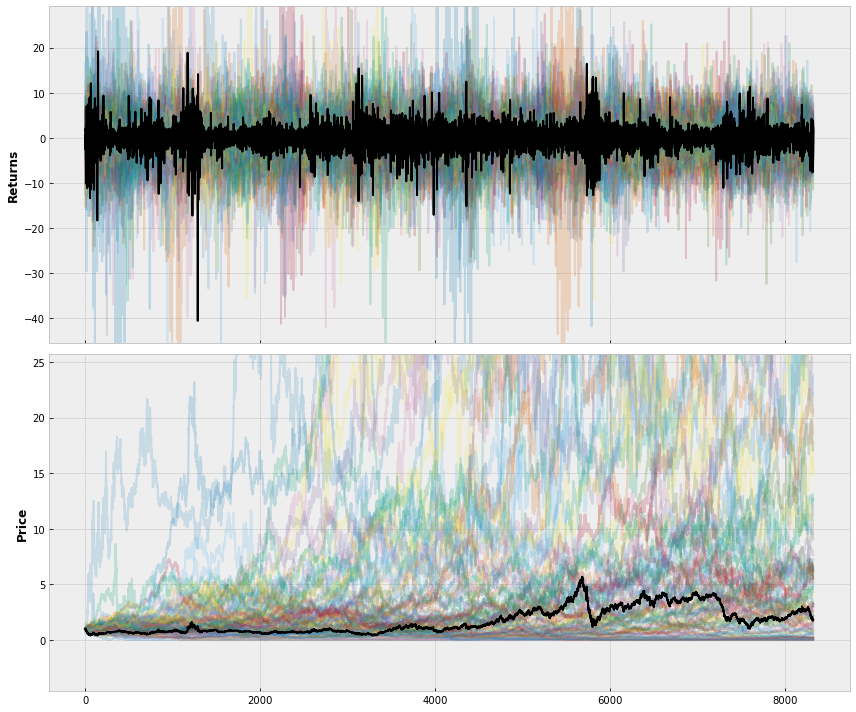

In [6]:
fig, ax = plt.subplots(2, 1, figsize=(12,10), sharex=True)

simulations_df.plot(alpha=0.2, legend=False, ax=ax[0])
ax[0].plot(crude_ret.values, color='k')
ax[0].set_ylabel('Returns', fontweight='bold')
ax[0].set_ylim([crude_ret.min()-5, crude_ret.max()+10])

simulations_df.div(100).cumsum().apply(np.exp).plot(legend=False, alpha=0.2, ax=ax[1])
crude_price = crude_ret.div(100).cumsum().apply(np.exp).values
ax[1].plot(crude_price, color='k')
ax[1].set_ylabel('Price', fontweight='bold')
ax[1].set_ylim([crude_price.min()-5, crude_price.max()+20])


plt.tight_layout()
plt.show()